In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Define Problem Statement and Objectives

##Problem

Axis insurance wants to know the factors responsible for the amount of insurance claim by custumers.

##Objective

*   To prove or disprove with statistical eveidence if the insurance claims by smoker is more than non smokers
*   To prove or disprove if the BMI of female is different from that of female
*   To prove or disprove that the smoking habit of customers depends on the region
* To prove or disprove that the BMI of women with no child, one child or two chile are the same.



## Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from   scipy.stats import chi2_contingency   # For Chi-Sq
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA

# library for statistical tests
import scipy.stats as stats

In [ ]:
sns.set() #setting the default seaborn style for our plots

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [ ]:
# write the code for reading the dataset AxisInsurance.csv
insurance_data = pd.read_csv(r'/content/drive/MyDrive/AxisInsurance.csv')
print(insurance_data)


      age     sex     bmi  children smoker     region      charges
0      21  female  16.000         1     no  northeast   3167.45585
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   52  female  46.750         5     no  southeast  12592.53450
1335   54  female  47.410         0    yes  southeast  63770.42801
1336   37  female  47.600         2    yes  southwest  46113.51100
1337   46  female  48.070         2     no  northeast   9432.92530

[1338 rows x 7 columns]


In [ ]:
insurance_data.shape

(1338, 7)

In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.000,1,no,northeast,3167.45585
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,26,female,15.500,2,yes,northeast,14455.64405
6,37,female,16.500,2,no,northeast,6877.98010
7,28,female,17.290,0,no,northeast,3732.62510
8,37,male,29.830,2,no,northeast,6406.41070
9,21,female,17.400,1,no,southwest,2585.26900


In [ ]:
insurance_data.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,47,female,45.32,1,no,southeast,8569.86180
1329,52,male,38.60,2,no,southwest,10325.20600
1330,50,female,46.09,1,no,southeast,9549.56510
1331,43,female,46.20,0,yes,southeast,45863.20500
1332,54,female,46.70,2,no,southwest,11538.42100
1333,50,male,30.97,3,no,northwest,10600.54830
1334,52,female,46.75,5,no,southeast,12592.53450
1335,54,female,47.41,0,yes,southeast,63770.42801
1336,37,female,47.60,2,yes,southwest,46113.51100
1337,46,female,48.07,2,no,northeast,9432.92530


Steps of Machine learnings


*   Getting the data
*   import the neccesary libraries
* Exploratory Data Analysis


1.   rows and columns (shape)
2.   data types and head
3. check the distribution of the data





In [ ]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.682687,1.094918,13270.422265
std,14.049960,6.145674,1.205493,12110.011237
min,18.000000,14.000000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance_data.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


The has 1338 rows and 7 columns


### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [ ]:
#checking the first 10 rows
insurance_data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.000,1,no,northeast,3167.45585
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,26,female,15.500,2,yes,northeast,14455.64405
6,37,female,16.500,2,no,northeast,6877.98010
7,28,female,17.290,0,no,northeast,3732.62510
8,37,male,29.830,2,no,northeast,6406.41070
9,21,female,17.400,1,no,southwest,2585.26900


In [ ]:
#checking the shape of the dataset
insurance_data.shape

(1338, 7)

In [ ]:
#checking the datatype
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Checking null value
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###Observation
From the Information above the data type are as follows

*   Age and children are intergers
*   Sex, smoker and region are object or categorical data
*   BMI and charges are float
* There is no null value in the dataset








In [ ]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.682687,1.094918,13270.422265
std,14.049960,6.145674,1.205493,12110.011237
min,18.000000,14.000000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### More Insight

* The average BMI is 30.66 and Maximum BMI is 53.13
* The average age of the primary beneficiary is 39.2 and maximum age is 64.
* The average medical charges is 13270, median is 9382 and maximum is 63770
* Customer on an average has 1 child.
* The mean Age, BMI, children is almost equal to median which mean it is normally distrubuted

### Univariate analysis

In [ ]:
def sum(a,b):
  a=2
  b=a+1

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, figsize=(18, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, ax=ax_box2, orient='h', showmeans=True, color="violet"
        )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, kde=kde, ax=ax_hist2, palette="winter"
    ) if bins else sns.histplot(
        data=data, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data.median(), color="black", linestyle="-"
    )  # Add median to the histogram

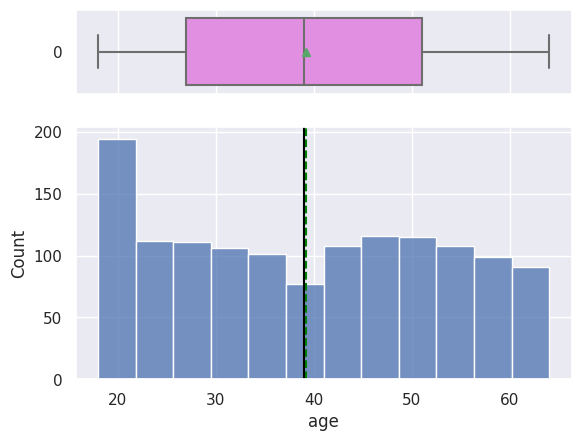

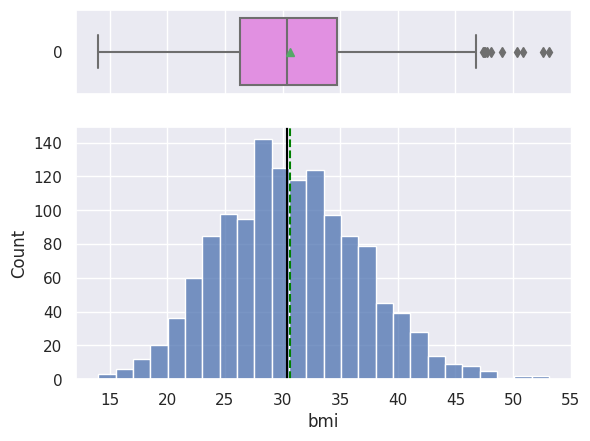

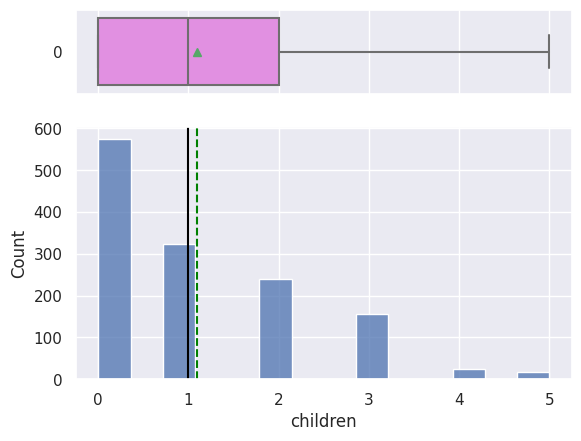

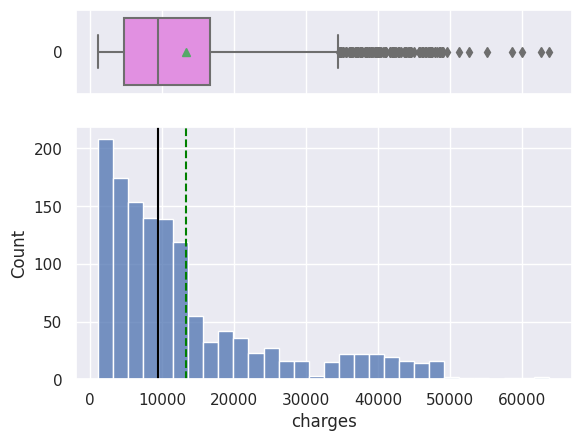

In [ ]:
#select all quantitative columns for checking the spread
col_list=  insurance_data.select_dtypes([np.number]).columns
for i in range(len(col_list)):
    histogram_boxplot(insurance_data[col_list[i]])

###Findings

* Age of customers lies between 20 - 65 . Average Age is aprrox. 40. 
* Majority of customer are in range 18- 20's.
* Bmi is normally distrubuted and Average BMI of beneficiary is 30. There are lot of outliers at upper end
* Most of the beneficary have no childrens.
* Average cost incured to the insurance is appro. 130000 and highest charge is 63770.There are lot of outliers at upper end.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

##**Sex** of customers


In [ ]:
gender = insurance_data.sex.value_counts()
gender

male      676
female    662
Name: sex, dtype: int64

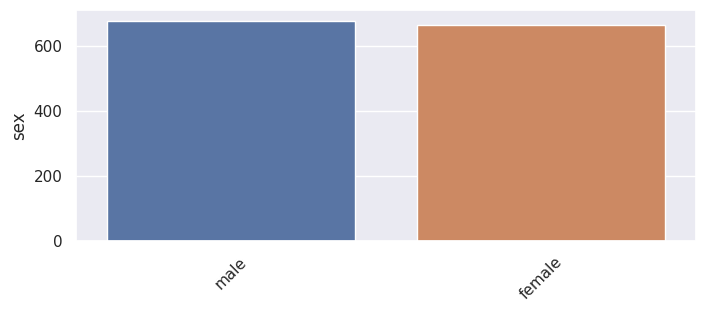

In [ ]:
plt.figure(figsize=(8,3))
plt.xticks(rotation=45)
sns.barplot(x=gender.index, y=gender);

##Number of customer per Region

In [ ]:
#checking the unique region
insurance_data.region.unique()

array(['northeast', 'southeast', 'northwest', 'southwest'], dtype=object)

In [ ]:
region = insurance_data.region.value_counts()
region

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

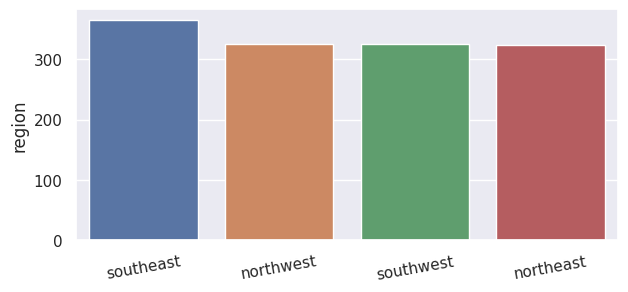

In [ ]:
plt.figure(figsize=(7,3))
plt.xticks(rotation=10)
sns.barplot(x=region.index, y=region);

###Age of Customer

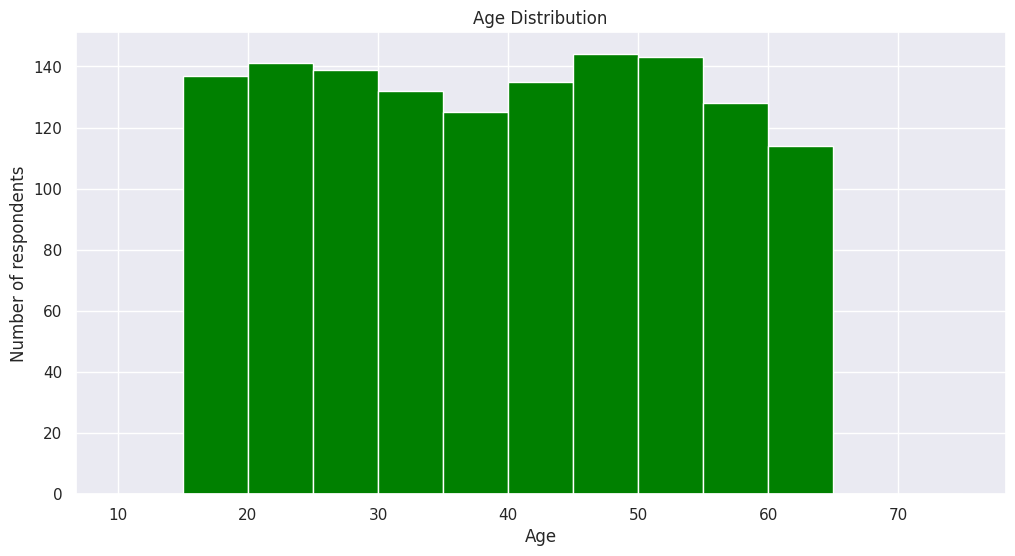

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(insurance_data.age, bins=np.arange(10,80,5), color='green');

### Bivariate Analysis

##Age Vs Charges

Text(0, 0.5, 'Charges')

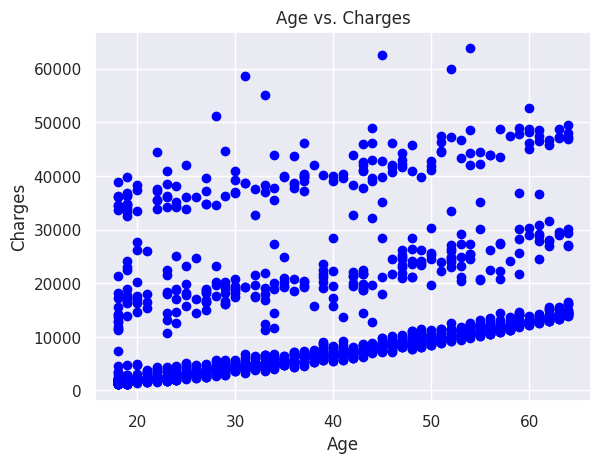

In [ ]:
#create scatterplot of Age vs. Charges
plt.scatter(insurance_data.age, insurance_data.charges, color="blue")
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

Text(0, 0.5, 'Charges')

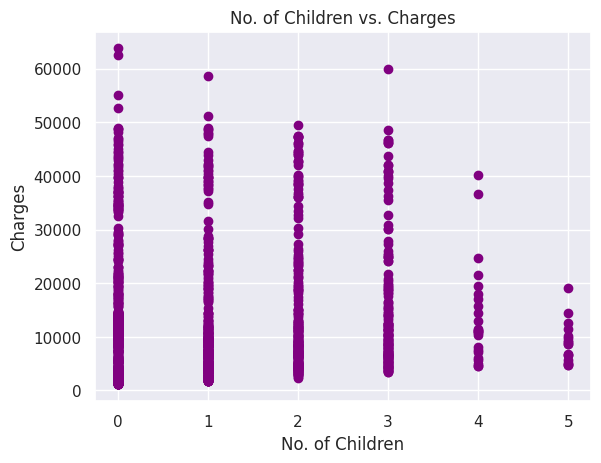

In [ ]:
#create scatterplot of Age vs. Charges
plt.scatter(insurance_data.children, insurance_data.charges,color="purple")
plt.title('No. of Children vs. Charges')
plt.xlabel('No. of Children')
plt.ylabel('Charges')

###More Findings

* Insurance charges increases with age 
* Insurance charges is independent of number of children

### Perform Visual Analysis

Text(0, 0.5, 'Charges')

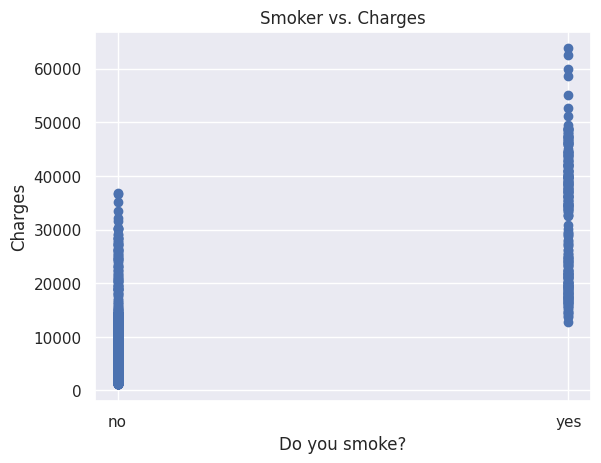

In [ ]:
#create scatterplot of smoker vs. Charges
plt.scatter(insurance_data.smoker, insurance_data.charges)
plt.title('Smoker vs. Charges')
plt.xlabel('Do you smoke?')
plt.ylabel('Charges')

### Step 1: Define the null and alternate hypotheses

$H_0:U_1=U_2$ There is no significat difference between the medical claim made by smokers and non smokers

$H_1:U_1>U_2$ The medical claim made by smokers is more than non smokers



### Step 2: Select Appropriate test

Standard deviation of the population is not given , the appropriate test is T test . 


### Step 3: Decide the significance level

α = 0.05


### Step 4: Collect and prepare data

In [ ]:
smoker=insurance_data.loc[insurance_data.smoker=="yes"]
smoker.head()

,age,sex,bmi,children,smoker,region,charges
5,26,female,15.50,2,yes,northeast,14455.64405
11,32,female,14.00,2,yes,northwest,32734.18630
14,27,male,42.13,0,yes,southeast,39611.75770
16,27,female,15.00,2,yes,northeast,15006.57945
19,30,male,35.30,0,yes,southwest,36837.46700


In [ ]:
smoker.count()

age         274
sex         274
bmi         274
children    274
smoker      274
region      274
charges     274
dtype: int64

In [ ]:
nonsmoker=insurance_data.loc[insurance_data.smoker=='no']
nonsmoker.head()

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.000,1,no,northeast,3167.45585
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
nonsmoker.count()

age         1064
sex         1064
bmi         1064
children    1064
smoker      1064
region      1064
charges     1064
dtype: int64

In [ ]:
# Adjusting the size of the rows to be equal
nonsmoker = nonsmoker[-274:]
smoker_charges = smoker.charges
nonsmoker_charges = nonsmoker.charges

In [ ]:
nonsmoker.count()

age         274
sex         274
bmi         274
children    274
smoker      274
region      274
charges     274
dtype: int64

Let us look at the average charges of smoker and non smoker

In [ ]:
print('Average medical claim for smoker is {} and nonsmoker is {} '.format(smoker_charges.mean(),nonsmoker_charges.mean()))

Average medical claim for smoker is 32050.23183153284 and nonsmoker is 8808.714184306571 


### Step 5: Calculate the p-value

In [ ]:
α=0.05
t_statistic1, p_value1 = stats.ttest_ind(smoker_charges, nonsmoker_charges)
p_value_onetail=p_value1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic1,p_value1, p_value_onetail ))

Test statistic = 29.44797800376851 , Pvalue =7.728298523822037e-115 , OnetailPvalue = 3.8641492619110185e-115


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value1 <α :
    print("P value {} is less than α {} ". format (p_value_onetail,α) )
    
else:
    print("P value {} is greater than α {} ". format (p_value_onetail,α))

P value 3.8641492619110185e-115 is less than α 0.05 


### Step 7:  Draw inference

Since P value < α we reject the null hypothesis and can conclude that medical claim by smoker is more than medical claim by non smoker. Similar result can also been seen in the scatter plot above Smokers Vs Charges


**A similar approach can be followed to answer the other questions.**

## Using statistical evidence, is BMI of females different from that of males?.

###Step 1: Define the null and alternate hypotheses

$H_0:U_1=U_2$ There is no significant difference in BMI between Male and Female

$H_1:U_1!=U_2$ The BMI of Male is different from that of female


### Step 2: Select Appropriate test

Standard deviation of the population is not given , the appropriate test is T test. Not equal to (!=) sign in alternate hypothesis indicate its a two tailed test.

### Step 3: Decide the significance level

In [ ]:
α = 0.05

### Step 4: Collect and prepare data



In [ ]:
#all observation for male.
male=insurance_data.loc[insurance_data.sex=="male"]
# all observation for females
female=insurance_data.loc[insurance_data.sex=="female"]

In [ ]:
#bmi of male and female
female_bmi=female.bmi
male_bmi=male.bmi

<ipython-input-39-5c16fdda7fb1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_bmi,color='green',hist=False)
<ipython-input-39-5c16fdda7fb1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(female_bmi,color='red',hist=False)


<Axes: xlabel='bmi', ylabel='Density'>

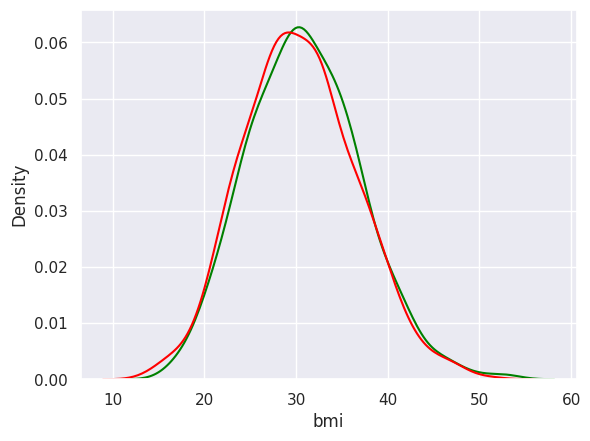

In [ ]:
sns.distplot(male_bmi,color='green',hist=False)
sns.distplot(female_bmi,color='red',hist=False)

In [ ]:
# calculating the average bmi of male and female
avg_male_bmi=male.bmi.mean()
avg_female_bmi=female.bmi.mean()
print('The average BMI of male is {} and that of female is {}.'.format(avg_male_bmi, avg_female_bmi))

The average BMI of male is 30.943128698224854 and that of female is 30.416737160120846.


### Step 5: Calculate the p-value

In [ ]:
# calculate the t statistic and p value
t_statistic2, p_value2 = stats.ttest_ind(male_bmi, female_bmi)
print("tstats = ",t_statistic2, ", pvalue = ", p_value2)

tstats =  1.5672925201317582 , pvalue =  0.11728314042826014


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value2 <α :
    print("P value {} is less than α {} ". format (p_value2,α) )
    
else:
    print("P value {} is greater than α {} ". format (p_value2,α))

P value 0.11728314042826014 is greater than α 0.05 


### Step 7:  Draw inference

Since the P value > α we fail to reject the null hypothesis and can conclude that There is no difference between BMI of Female and BMI of Male.

## Let's check the smoking habit of customers depend base on their region


In [ ]:
#create scatterplot of smoker vs. Charges
contigency_table= pd.crosstab(insurance_data.region, insurance_data.smoker)
contigency_table

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


<Axes: xlabel='region'>

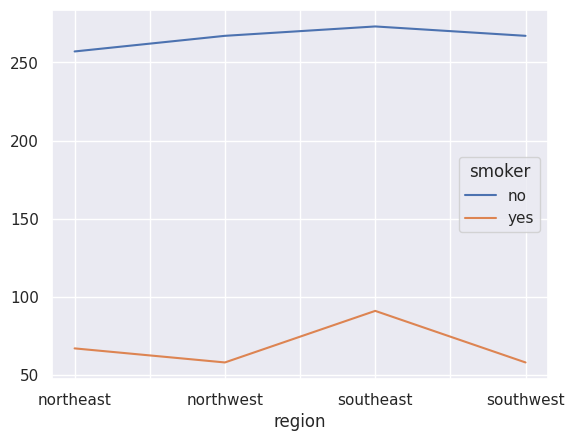

In [ ]:
 contigency_table.plot(kind='line')

### Step 1: Define the null and alternate hypotheses

$H_0:$ The smoking habit of customers is independent of their region

$H_1$ The smoking habit of customer depends on their region





### Step 2: Select Appropriate test

The appropriate test is the chi-square




### Step 3: Decide the significance level

In [ ]:
α = 0.05

### Step 4: Calculate the P value 

In [ ]:
# Using the chi2_contingency test  
chi2, pval, dof, exp_freq = chi2_contingency(contigency_table, correction = False)
print('chi-square statistic: {} , Pvalue: {} , Degree of freedom: {} ,expected frequencies: {} '.format(chi2, pval, dof, exp_freq))

chi-square statistic: 7.343477761407071 , Pvalue: 0.06171954839170541 , Degree of freedom: 3 ,expected frequencies: [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]] 


### Step 5: Compare the p-value with $\alpha$

In [ ]:
if (pval < α):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Failed to reject Null Hypothesis


### Step 7:  Draw inference

Since P value > α we fail to reject the null hypothesis and conclude the the smoking habit of customer is independent of the region



## Is the mean BMI of women with no children, one child and two children the same? using statistical evidence.

### Step 1: Define the null and alternate hypotheses

$H_0:U_1=U_2=U_3$ The BMI of women with no child, one child and two child are the same

$H_1:$ The BMI of atleast one of the women is differnt

### Step 2: Select Appropriate test

The appropriate test is the One ANOVA

### Step 3: Decide the significance level

In [ ]:
α = 0.05

### Step 4: Collect and prepare data

In [ ]:
woman_2_children = female.loc[female['children']<=2]

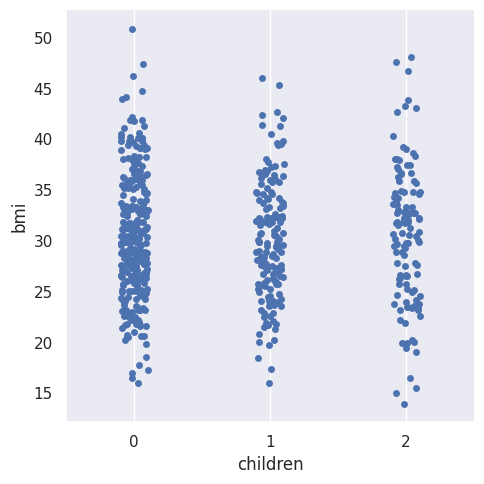

In [ ]:
# visualizing Women BMI with children 0, 1, 2;
sns.catplot(x="children", y="bmi", data=woman_2_children)
plt.grid()
plt.show()


### Step 5: Applying Anova 

In [ ]:
# Importing ANOVA libraries and applying it
formula = 'bmi ~ C(children)'
model = ols(formula, woman_2_children).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(children),2.0,25.090150,12.545075,0.328678,0.720013
Residual,563.0,21488.756883,38.168307,NaN,NaN


### Step 7:  Draw inference

Since the P value of 0.72 > 0.05 we fail to reject the null hypothesis and conclude that the mean BMI of women with no child, one child and two child are he same.  

## Conclusion and Business Recommendations


* From the EDA and statistical evidence it can be seen that customer who smoke or have higher BMI have more higher insurance claim. 
* we can recommend that customer should quick smoking and involve in things that will reduce their BMI
* We can provide customers with Diet plans and wellness health coaches which can help to improve healthy lifestyle.
* We provide subsidice Gym or fitness devices to encourage customers to exercise.
